Load saved policy from run1.npz

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from CartPole_with_gym import discretize_state

np.random.seed(0)
env = gym.make('CartPole-v1')

File = np.load('run1.npz')
Q = File['Q']
rewards_per_episode = File['rewards_per_episode']
max_steps = File['max_steps']

Visualise the training process (total reward of each training episode).
The plot shows that reward steadily increases during training (of total reward of 500 is the maximum allowed).

Text(0, 0.5, 'Total Reward')

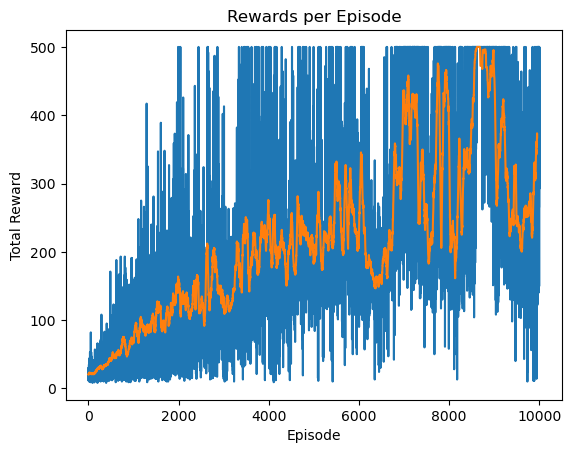

In [2]:
rewards_per_episode = np.asarray(rewards_per_episode)
plt.plot(rewards_per_episode)
window_size = 50
moving_average = np.convolve(rewards_per_episode, np.ones(window_size)/window_size, mode='valid')
plt.plot(moving_average)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

Test the trained policy

/Users/caseybarkan/opt/anaconda3/envs/RL_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Testing the trained agent over 100 episodes:
Average reward: 364.01
Standard deviation: 138.41
Minimum reward: 114.00
Maximum reward: 500.00


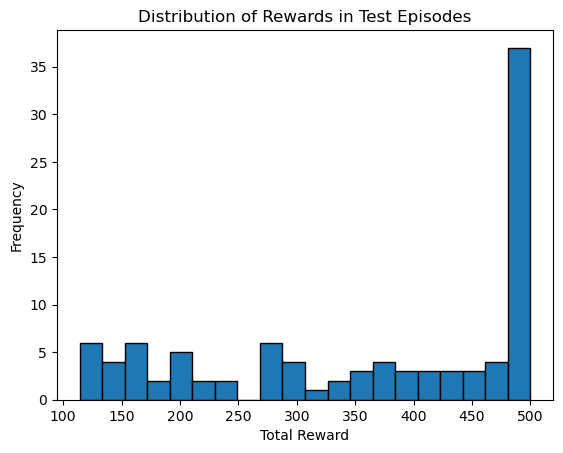

In [3]:
num_test_episodes = 100
test_rewards = []

for _ in range(num_test_episodes):
    state, _ = env.reset()
    total_reward = 0
    
    for _ in range(max_steps):
        state_disc = discretize_state(state)
        action = np.argmax(Q[state_disc])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        if done:
            break
    
    test_rewards.append(total_reward)

print(f"\nTesting the trained agent over {num_test_episodes} episodes:")
print(f"Average reward: {np.mean(test_rewards):.2f}")
print(f"Standard deviation: {np.std(test_rewards):.2f}")
print(f"Minimum reward: {np.min(test_rewards):.2f}")
print(f"Maximum reward: {np.max(test_rewards):.2f}")

# Plot the distribution of test rewards
plt.hist(test_rewards, bins=20, edgecolor='black')
plt.title('Distribution of Rewards in Test Episodes')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')

plt.show()